# **Primera parte Proyecto Final**

El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, causando la muerte de 1502 de los 2224 pasajeros y tripulantes. Esta tragedia sensacional conmocionó a la comunidad internacional y llevó a la implementación de regulaciones de seguridad más estrictas para los barcos.

Una de las razones por las que el naufragio resultó en tal pérdida de vidas fue la falta de botes salvavidas para los pasajeros y la tripulación. Aunque hubo cierto elemento de suerte en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como mujeres, niños y la clase alta.

### **Conjunto de Datos del Titanic**

El conjunto de datos del Titanic contiene información sobre las 1309 personas involucradas en el naufragio del Titanic, donde se indica si la persona finalmente sobrevivio al naufragio.

### **Objetivo**
Predecir si un pasajero sobrevivió al hundimiento del Titanic o no.

### **Diccionario de datos**

1. **PassengerID (ID del Pasajero):**
   - Descripción: Un identificador único asignado a cada pasajero.
   - Uso: Este identificador sirve para distinguir a cada pasajero de manera única en el conjunto de datos.

2. **Survived (Sobrevivió):**
   - Descripción: Indica si el pasajero sobrevivió o no al naufragio.
   - Uso: Es la variable objetivo que se intenta predecir. Puede tomar dos valores: 0 (No sobrevivió) o 1 (Sobrevivió).

3. **Pclass (Clase del Pasajero):**
   - Descripción: Representa la clase en la que viajaba el pasajero.
   - Uso: Puede ser 1 (Primera clase), 2 (Segunda clase) o 3 (Tercera clase). Indica el estatus socioeconómico del pasajero.

4. **Name (Nombre):**
   - Descripción: El nombre del pasajero.
   - Uso: Sirve para identificar a cada pasajero por su nombre.

5. **Sex (Género):**
   - Descripción: El género (sexo) del pasajero.
   - Uso: Puede ser Female (Femenino) o Male (Masculino).


6. **Age (Edad):**
   - Descripción: La edad del pasajero.
   - Uso: Indica la edad del pasajero en años.


7. **Sibsp (Número de hermanos/cónyuges a bordo):**
   - Descripción: La cantidad de hermanos o cónyuges que el pasajero tenía a bordo.
   - Uso: Proporciona información sobre la familia del pasajero.


8. **Parch (Número de padres/hijos a bordo):**
   - Descripción: La cantidad de padres o hijos que el pasajero tenía a bordo.
   - Uso: Ofrece información adicional sobre la composición familiar del pasajero.


9. **Ticket (Número de boleto):**
   - Descripción: El número de boleto del pasajero.
   - Uso: Identifica el boleto asociado a cada pasajero.


10. **Fare (Tarifa):**
    - Descripción: La tarifa pagada por el pasajero.
    - Uso: Indica el costo del pasaje en libras esterlinas.


11. **Cabin (Número de cabina):**
    - Descripción: El número de cabina del pasajero.
    - Uso: Identifica la cabina asignada a cada pasajero.


12. **Embarked (Puerto de Embarque):**
    - Descripción: El puerto desde el cual el pasajero embarcó en el Titanic.
    - Uso: Puede ser C (Cherbourg), Q (Queenstown), o S (Southampton). Indica el punto de partida del viaje del pasajero.

### **Análisis Exploratorio de Datos (EDA)**
**Carga y exploración de datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
sns.set_style("whitegrid")

In [2]:
data = pd.read_csv("titanic3.csv")
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Verificamos primero los datos para saber si estos obtiene datos nulos

In [4]:
data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Se pude comprobar que el dataset **contiene datos nulos**. Por lo tanto seria necesario realizar data wrangling en el dataset antes de realizar los modelos de predicción.

Para el analisis no se tendran en cuenta el nombre,cabina,bote,identificación del cuepo,destino y el numero de ticket. Por lo tanto se precedera a elimiar del dataset a estos campos.

In [5]:
data = data.drop(columns=["name","cabin","boat","body","home.dest","ticket"])

### Graficas

* Las conclusiones se llevaran a cabo en el ultimo apartado del informe

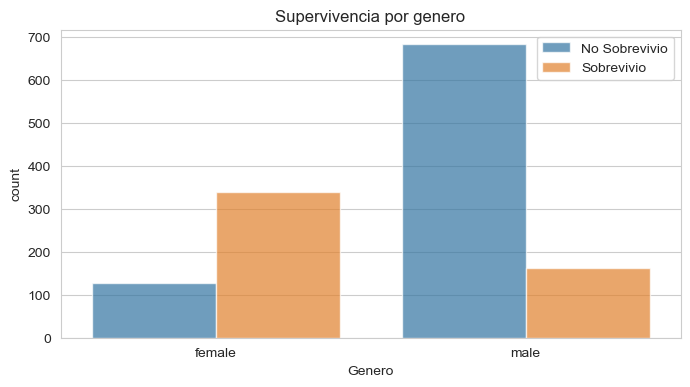

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x = "sex", data=data,hue="survived",alpha=0.7)
ax.set_title("Supervivencia por genero")
ax.set_xlabel("Genero")
ax.legend(("No Sobrevivio","Sobrevivio"))

In [7]:
merc = data.groupby(["sex","survived"],as_index=True)["survived"].count()
merc

sex     survived
female  0           127
        1           339
male    0           682
        1           161
Name: survived, dtype: int64

In [8]:
rate_survived_male = round(161/682,2)*100
rate_survived_female = round(127/339,2)*100
print("Tasa de supervivencia de hombres: ",rate_survived_male,"%")
print("Tasa de supervivencia de mujeres: ",rate_survived_female,"%")

Tasa de supervivencia de hombres:  24.0 %
Tasa de supervivencia de mujeres:  37.0 %


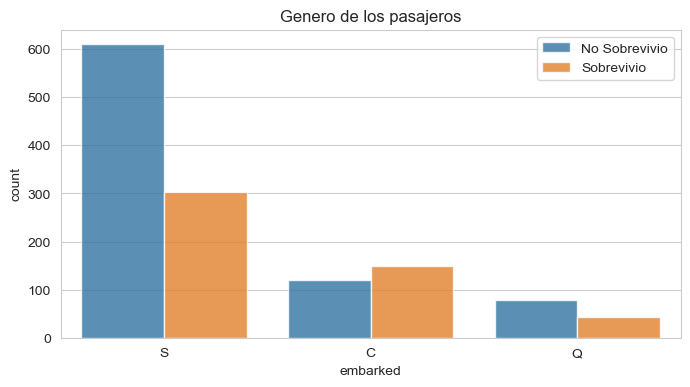

In [9]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(x="embarked", data=data ,hue="survived",alpha=0.8)
ax.set_title("Genero de los pasajeros")
ax.legend(("No Sobrevivio","Sobrevivio"))

In [10]:
data_sibsp = data.groupby(["sibsp"],as_index=False)["sibsp"].count()
data_parch = data.groupby("parch",as_index=False)["parch"].count()

Text(0, 0.5, 'Pasajeros')

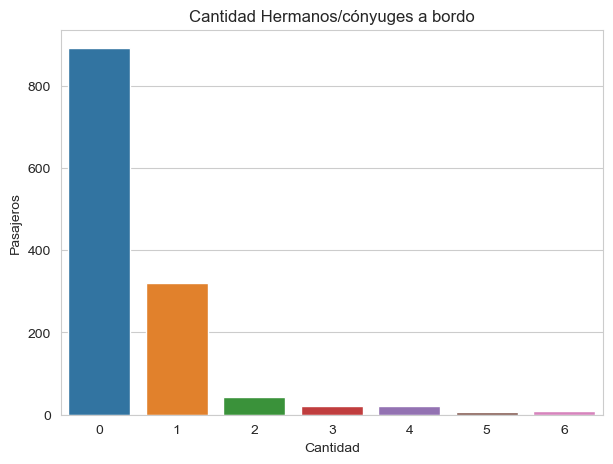

In [11]:
fig,ax = plt.subplots(figsize = (7,5))
ax = sns.barplot(data=data_sibsp, y="sibsp", x=data_sibsp.index)
ax.set_title("Cantidad Hermanos/cónyuges a bordo")
ax.set_xlabel("Cantidad")
ax.set_ylabel("Pasajeros")

Text(0, 0.5, 'Pasajeros')

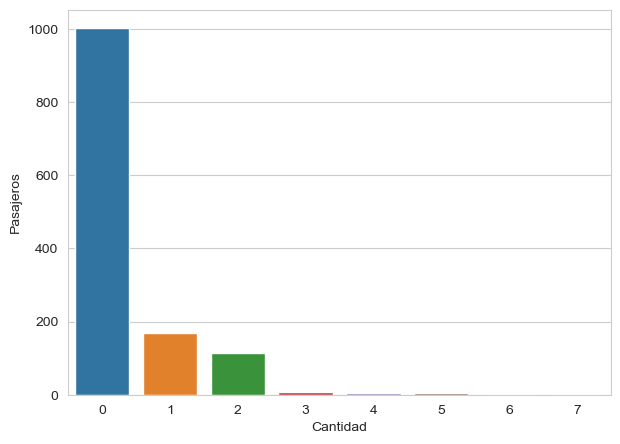

In [12]:
fig,ax = plt.subplots(figsize = (7,5))
ax = sns.barplot(data=data_parch, y="parch", x=data_parch.index)
ax.set_xlabel("Cantidad de padres/hijos a bordo")
ax.set_xlabel("Cantidad")
ax.set_ylabel("Pasajeros")

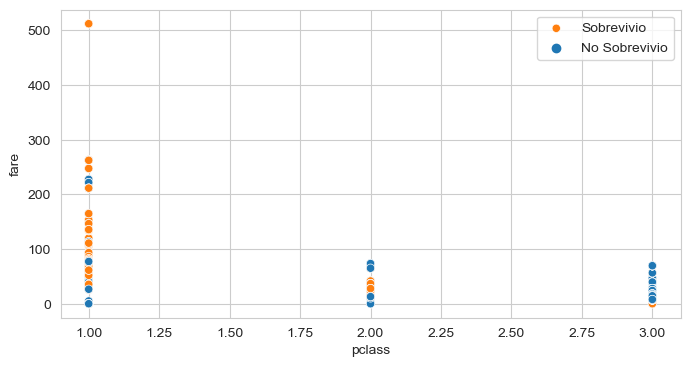

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
scatter_class = sns.scatterplot(data=data, y ='fare', x ='pclass', hue="survived", alpha=1)
ax.legend(("Sobrevivio","No Sobrevivio"))

Text(0.5, 0, 'Edad')

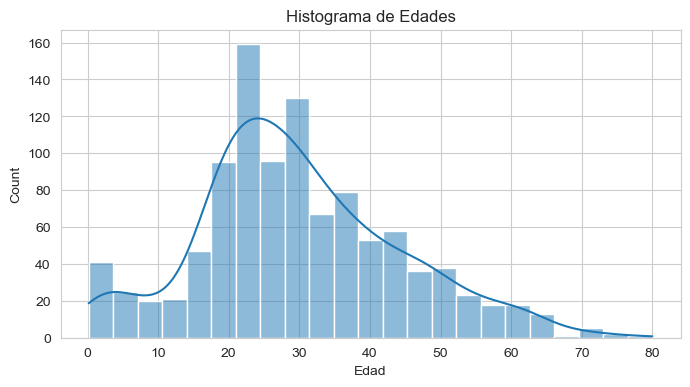

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.histplot(data = data["age"],kde=True)
ax.set_title("Histograma de Edades")
ax.set_xlabel("Edad")

In [15]:
data["age"].describe()

count    1046.000000
mean       29.881135
std        14.413500
min         0.166700
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [16]:
label_encoder = LabelEncoder()
data["sex"] = label_encoder.fit_transform(data["sex"])
data["embarked"] = label_encoder.fit_transform(data["embarked"])
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.0000,0,0,211.3375,2
1,1,1,1,0.9167,1,2,151.5500,2
2,1,0,0,2.0000,1,2,151.5500,2
3,1,0,1,30.0000,1,2,151.5500,2
4,1,0,0,25.0000,1,2,151.5500,2


Text(0.5, 1.0, 'Mapa de Calor de Correlación')

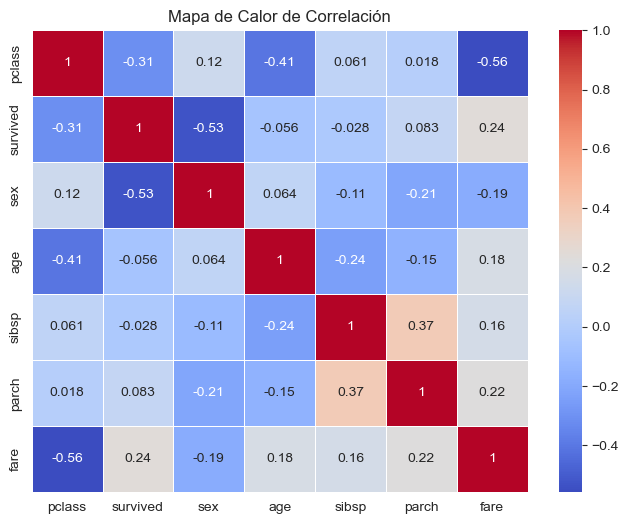

In [17]:
correlation_matrix = data[['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")

## **Data Wrangling**

In [18]:
mean_fare = data['fare'].mean()
data["fare"].fillna(mean_fare,inplace=True)

In [19]:
mean_age_male = round(data.loc[data['sex'] == 1, 'age'].mean(),2)
mean_age_female = round(data.loc[data['sex'] == 0, 'age'].mean(),2)
data.loc[(data['sex'] == 1) & (data['age'].isnull()), 'age'] = mean_age_male
data.loc[(data['sex'] == 0) & (data['age'].isnull()), 'age'] = mean_age_female
data['embarked'] = data['embarked'].fillna(method='backfill')

## **Modelado**

Se realizara un modelo de clasificación por lo tanto se opto por realizar los siguientes 3 modelos:
- LogisticRegression
- RandomForestClassifier
- DecisionTreeClassifier

In [20]:
X = data.drop(columns=["survived"])
Y = data["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
model_Logistic = LogisticRegression(max_iter=300)
model_Logistic.fit(X_train, y_train)
y_pred_lg = model_Logistic.predict(X_test)
print("Classification_Report: \n")
print(classification_report(y_test,y_pred_lg))

Classification_Report: 

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       157
           1       0.73      0.70      0.71       105

    accuracy                           0.77       262
   macro avg       0.77      0.76      0.76       262
weighted avg       0.77      0.77      0.77       262



In [22]:
model_RamdonForest = RandomForestClassifier(criterion='entropy',n_estimators=100)
model_RamdonForest.fit(X_train, y_train)
y_pred_rf = model_RamdonForest.predict(X_test)
print("Classification_Report: \n")
print(classification_report(y_test,y_pred_rf))

Classification_Report: 

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       157
           1       0.77      0.70      0.74       105

    accuracy                           0.80       262
   macro avg       0.79      0.78      0.79       262
weighted avg       0.80      0.80      0.80       262



In [23]:
model_Tree = DecisionTreeClassifier()
model_Tree.fit(X_train,y_train)
y_pred_tree = model_Tree.predict(X_test)
print("Classification_Report: \n")
print(classification_report(y_test,y_pred_tree))

Classification_Report: 

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       157
           1       0.71      0.68      0.69       105

    accuracy                           0.76       262
   macro avg       0.75      0.75      0.75       262
weighted avg       0.76      0.76      0.76       262



## **Importancias de Caracteristicas**

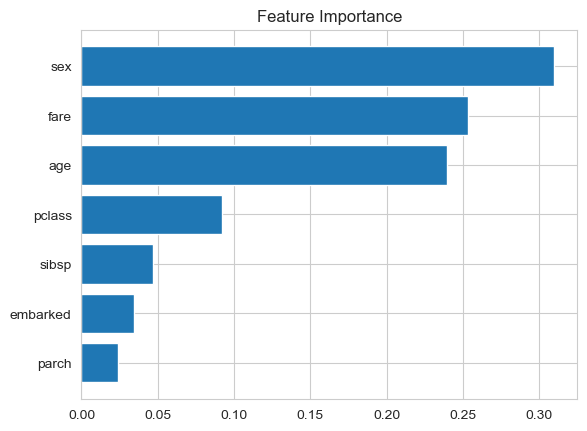

In [24]:
feature_importance = model_Tree.feature_importances_
sorted_idx = np.argsort(feature_importance)
features = X.columns
plt.figure()
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.title('Feature Importance')
plt.show()

## **Conclusiones**


En conclusión, el análisis de los datos del naufragio del Titanic revela patrones significativos que influyeron en la tasa de supervivencia de los pasajeros. La superioridad en la supervivencia de las mujeres sobre los hombres es evidente, respaldando la prioridad dada a las mujeres durante la evacuación. La mayoría de los pasajeros viajaban solos, sin hermanos, cónyuges, padres o hijos a bordo, y aquellos que llevaban a algún familiar tendían a tener solo uno.

La relación entre el número de hermanos/cónyuges y el de padres/hijos indica cierta coherencia en los lazos familiares de los pasajeros. Asimismo, el análisis de la tarifa del boleto revela una correlación directa entre la clase del pasajero y el monto pagado, con una clara ventaja de supervivencia para aquellos que pagaron tarifas más altas, predominantemente ubicados en la primera clase.

El perfil de edad de los pasajeros muestra una distribución normal sesgada hacia la izquierda, indicando que la mayoría de la población era joven. Además, se observa que las personas mayores tienden a pertenecer a clases más altas, sugiriendo una relación entre la edad y la posición socioeconómica.

En cuanto a los modelos de predicción, la regresión logística y el árbol de decisión ofrecen métricas similares, pero se selecciona la regresion logistica como el mejor modelo debido a su eficiencia en el tiempo de procesamiento.